# More Propagation of Errors

### Goals:

1. To use simulated experiments to deepen our understanding of propogation of errors.
2. To use visual representations to further deepen our understanding of propogation of errors.

### Timing

1. Try to finish this notebook in 30-35 minutes


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


| Function Name            | What it does |
| - | - |
|    numpy.expand_dims     | Adds a dimension to an array, useful for expanding two 1-D arrays into a 2-D array |
| plt.imshow               | Makes a 2D-color plot by taking the values in a 2-D array to set a color scale |
| plt.colorbar             | Adds a key corresponding to the color scale, e.g., when using plt.imshow |

### Visual understanding of propagation of errors

Recall that we just simulated the "distance ladder" by measuring the area of a desk or table using some objects that we had sitting around.

These were the instructions, and the formula for the area of the table.

1. Take a card from your wallet or bag, maybe an ID card, or a business card, or a debit card or whatever.
2. Estimate the length of the card, in centimeters.  Let's call that $C$.  E.g., for me, I'm using a debit card from my wallet and I estimate $C \sim 8 {\rm cm}$.
3. Find a book, something that is a few times longer than the card.  Now measure the length of the book using the card.  Let's call that $B$.  E.g., for me, i'm using a Moleskine notebook that was sitting on my desk and I measured $B \sim 2.5$ cards.
4. Now measure the length and width of the table, using the book. Let's call these $l$ and $w.$  For me, I measure $w \sim 5.1$ and $l \sim 3.8$ books.
5. Now we do the math and estimate the area of the desk. 

The width of the desk in cm is $(w * B * C)$, the length in cm is  $(l * B * C)$, so the area is

$A = (w * B * C)(l * B * C)$ 

$A = w * l * B^2 * C^2$


Then we used the formula below to compute how much variation we expect in $A$ if the input paramters change:

$\sigma_A^2 = \left(\frac{\partial A}{\partial l} \delta l\right)^2 + \left(\frac{\partial A}{\partial w} \delta w\right)^2 + \left(\frac{\partial A}{\partial B} \delta B\right)^2 + \left(\frac{\partial A}{\partial C} \delta C\right)^2$

And we arrived at these formula for the uncertainy in the Area of the table, in terms of the uncertainties in the quantities that we actually measured.

$\frac{\delta A}{A} = \frac{\sigma_A}{A} = \left(\left(\frac{\delta l}{l}\right)^2 + \left(\frac{\delta w}{w}\right)^2 + \left(2 \frac{\delta B}{B}\right)^2 + \left(2 \frac{\delta C}{C}\right)^2\right)^{1/2}$ 

Where $\delta A$ is our estimate of the uncertainty of the table, which is what we get by estimating the expected variance $\sigma_A^2$ of a large set of measurments that were distributed according to the uncertainties on $w, l, B, C$.


# First example, how our estimate of A depends on our measurement of l

We are going to run what is often called a "Toy Simulation" or a "Toy Monte Carlo" ("Monte Carlo" is a simulation technique where you generate a bunch of random numbers to simulate a range of possible outcomes).

Specifically, we are going to simulation 10000 measurement of the length of the desk, assuming that the come from a "Gaussian" or "Normal" distribution that is centered on the value that we measured, but that have a standard deviation of 10% of that value.  

Then we are going to see what happens to the distribution of outcomes.  I.e., of the measurements of the area of the desk.

In [2]:
rng = np.random.default_rng(42)

In [3]:
C_m = 8.
B_m = 2.5
l_m = 3.8
w_m = 5.1
A_m = w_m * l_m * B_m**2 * C_m**2
print(f"Area of desk: {A_m:0.2f} cm^2")

# let's write a function to do that computation:
def deskArea(w, l, B, C):
    return w * l * B**2 * C**2

Area of desk: 7752.00 cm^2


In [4]:
# This function will simulate 10000 measurements with drawn from a Normal distribtuion 
# The distribtuion is centered at l_m and has standard deviation of 0.1*l_m
l_sim = rng.normal(loc=l_m, scale=0.1*l_m, size=10000)

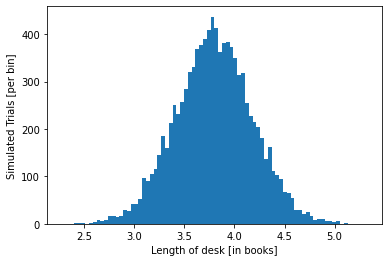

Measurements of desk length: 3.80 ± 0.38 [books]


In [5]:
plt.hist(l_sim, bins=np.linspace(0.6*l_m, 1.4*l_m, 81))
plt.xlabel("Length of desk [in books]")
plt.ylabel("Simulated Trials [per bin]")
plt.show()

print(f"Measurements of desk length: {np.mean(l_sim):0.2f} ± {np.std(l_sim):0.2f} [books]")

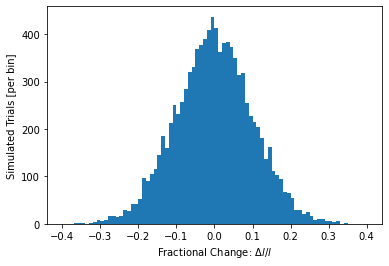

Fractional Change: -0.00 ± 0.10


In [6]:
plt.hist((l_sim/l_m)-1, bins=np.linspace(-0.4, 0.4, 81))
plt.xlabel(r'Fractional Change: $\Delta l / l$')
plt.ylabel("Simulated Trials [per bin]")
plt.show()

print(f"Fractional Change: {np.mean((l_sim/l_m)-1):0.2f} ± {np.std((l_sim/l_m)-1):0.2f}")

### Questions for discussion:

#### 3.1  Explain, in your own words, what is being shown in the two plots above.   How does this relate to the uncertainty on the measurement of $l$

### Now, let's make a figure to show how A depends on l

In [7]:
# Let's make a grid of value of l that covers a wide range around the value that we measured.
l_grid = l_m*np.linspace(0.6, 1.4, 81)
# And let's compute the Area of each value of l
A_from_l = deskArea(w_m, l_grid, B_m, C_m)

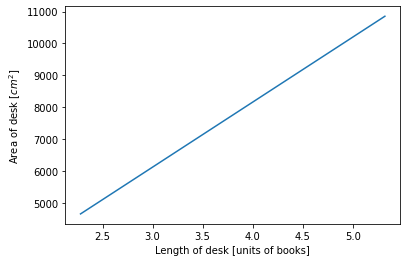

In [8]:
# Now we plot A version l_grid
plt.plot(l_grid, A_from_l)
plt.ylabel(r'Area of desk [$cm^2$]')
plt.xlabel(r'Length of desk [units of books]')
plt.show()

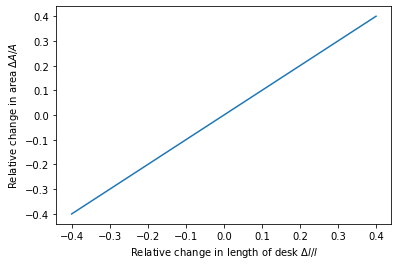

In [9]:
plt.plot((l_grid/l_m)-1, (A_from_l/A_m)-1)
plt.ylabel(r'Relative change in area $\Delta A / A$')
plt.xlabel(r'Relative change in length of desk $\Delta l / l$')
plt.show()

### Questions for discussion:

#### 4.1  Explain, again in your own words, what is being shown in the two plots above.  How does this relate to the formula shown above, in particular the formula that includes the partial derivatives?

### Combining the sets of plots above.

The first set of plots show use what range of measurments we might expect for $l$ and $\frac{\delta}{l}$.  The second plot shows use how $A$ changes if we change $l$.

If we "combine" the two plots, we see the range of values that we might expect for $A$, given the uncertaintiy in $l$.

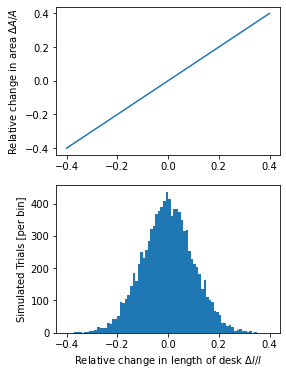

In [10]:
fig, (axis0, axis1) = plt.subplots(2, 1, figsize=(4,6))

axis0.plot((l_grid/l_m)-1, (A_from_l/A_m)-1)
axis1.hist((l_sim/l_m)-1, bins=(l_grid/l_m)-1)

axis0.set_ylabel(r'Relative change in area $\Delta A / A$')
axis1.set_ylabel("Simulated Trials [per bin]")
axis1.set_xlabel(r'Relative change in length of desk $\Delta l / l$')

plt.show()

What we mean when we say that we "combine" the two plots, is that for each value of $\frac{\Delta l}{l}$ on the x-axis, the top plot tells us the resulting change $\frac{\Delta A}{A}$, while the bottom plot tells us how likely that value of $\frac{\Delta l}{l}$ is to occur.  

So, we see that large changes in $l$ are less likely that small changes.  And the distribution of outcomes from our little simulation give us a sense of the scatter we would expect in $A$.

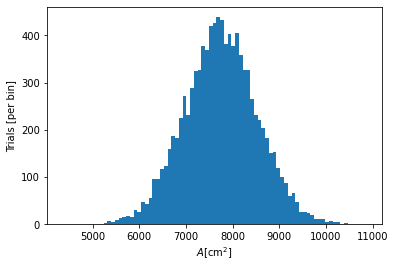

Area of desk: 7744.05 ± 780.07


In [11]:
# compute the area for the 10000 "simulated" measurements of l
A_sim_1 = deskArea(w_m, l_sim, B_m, C_m)

plt.hist(A_sim_1, bins=81)
plt.xlabel(r'$A [{\rm cm}^2]$')
plt.ylabel(r'Trials [per bin]')
plt.show()

print(f"Area of desk: {np.mean(A_sim_1):0.2f} ± {np.std(A_sim_1):0.2f}")

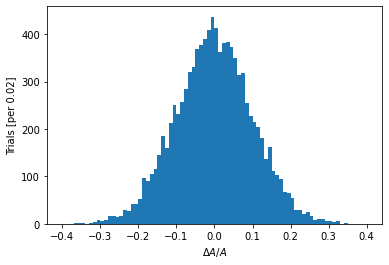

Fractional Change: -0.00 ± 0.10


In [12]:
# Here we are going to compute the resulting relative change in A
dA_over_A_sim_1 = (A_sim_1 - A_m)/A_m

plt.hist(dA_over_A_sim_1, bins=np.linspace(-0.4, 0.4, 81))
plt.xlabel(r'$\Delta A / A$')
plt.ylabel(r'Trials [per 0.02]')
plt.show()

print(f"Fractional Change: {np.mean(dA_over_A_sim_1):0.2f} ± {np.std(dA_over_A_sim_1):0.2f}")

### Question for discussion.  

#### 5.1 How can we interpret the two plots above?  What does it mean for our estimate of the uncertainty on $A$?

# Second example: how our estimate of A depends on C

Now we are going to repeat the exercise, but this time we are going to vary $C$, our estimate of the length of the card in cm.

In [13]:
C_grid = C_m*np.linspace(0.6, 1.4, 81)
C_sim = rng.normal(loc=C_m, scale=0.1*C_m, size=10000)
A_from_C = deskArea(w_m, l_m, B_m, C_m*np.linspace(0.6, 1.4, 81))

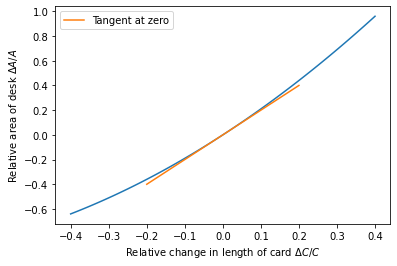

In [14]:
plt.plot((C_m*np.linspace(0.6, 1.4, 81)/C_m)-1, (A_from_C/A_m)-1)
plt.ylabel(r'Relative area of desk $\Delta A / A$')
plt.xlabel(r'Relative change in length of card $\Delta C / C$')
plt.plot(np.linspace(-0.2,0.2,11), 2*np.linspace(-0.2,0.2,11), label="Tangent at zero")
plt.legend()
plt.show()

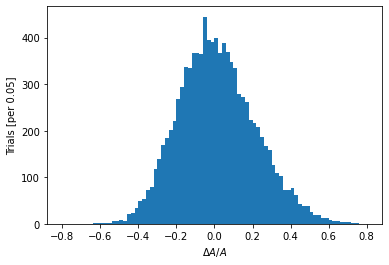

Fractional Change: 0.01 ± 0.20


In [15]:
A_sim_2 = deskArea(w_m, l_m, B_m, C_sim)
dA_over_A_sim_2 = (A_sim_2 - A_m)/A_m

plt.hist(dA_over_A_sim_2, bins=np.linspace(-0.8, 0.8, 81))
plt.xlabel(r'$\Delta A / A$')
plt.ylabel(r'Trials [per 0.05]')
plt.show()

print(f"Fractional Change: {np.mean(dA_over_A_sim_2):0.2f} ± {np.std(dA_over_A_sim_2):0.2f}")

### Questions for discussion.  

#### 6.1 How can we interpret the two plots above?  What does it mean for our estimate of the uncertainty on $A$?  
#### 6.2 Why does this differ from the results we got when we considered the variation in $A$ due to the variation in $l$?  
#### 6.3 Why did we draw the tangent line on the figure a few cells up?   What does the tangent line correspond to in the equation for propagation of errors?

# Third example: how our estimate of A depends on the combination of l and w

#### First, how does lets see how A depends on changes in w and l.

To estimate that, we are going to compute the area for a grid of values of w and l and plot the results.

The x and y axes show the changes in w and l, respectively, the color scale shows the resulting change in A.

What we see is that if both w and l were higher, the area would be larger, if they were both smaller the area would be smaller, and if one is large and the other smaller the effects tend to cancel.  This is hardly surprising.


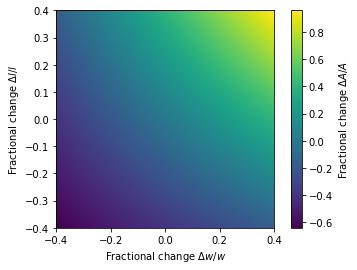

In [16]:
relValue = (deskArea(w_m*np.linspace(0.6, 1.4, 81),
                     np.expand_dims(l_m*np.linspace(0.6, 1.4, 81), -1), B_m, C_m)/A_m ) - 1.

plt.imshow(relValue, origin='lower', extent=(-0.4, 0.4, -0.4, 0.4)) 
plt.colorbar(label=r'Fractional change $\Delta A / A$')
plt.xlabel(r'Fractional change $\Delta w / w$')
plt.ylabel(r'Fractional change $\Delta l / l$')
plt.show()

#### Now lets consider how likely it is that we get particular sets of changes.

These plots show the number of times we get a particular set of changes in our simulations.

Let's consider changes in both $w$ and $l$, which are independent measurements. 

In [17]:
# We already have l_sim, so we just need w_sim
w_sim = rng.normal(loc=w_m, scale=0.1*w_m, size=10000)

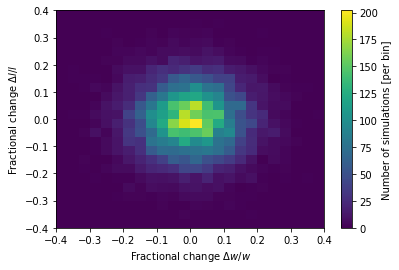

In [18]:
plt.hist2d((w_sim/w_m)-1, (l_sim/l_m)-1., bins=np.linspace(-0.4,0.4,25))
plt.xlabel(r'Fractional change $\Delta w / w$')
plt.ylabel(r'Fractional change $\Delta l / l$')
plt.colorbar(label=r'Number of simulations [per bin]')
plt.show()

### Questions for discussion

#### 7.1 This plot, and the plot before, are two dimensional versions of the plots what we used to illustrate how changes in one input variable cause changes in the outcome.  Explain these plots, and what we can learn from them, in your own words.

### Effect of changing both l and w

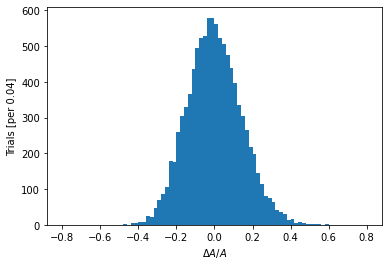

Fractional Change: 0.00 ± 0.14


In [19]:
A_sim_3 = deskArea(w_sim, l_sim, B_m, C_m)
dA_over_A_sim_3 = (A_sim_3 - A_m)/A_m

plt.hist(dA_over_A_sim_3, bins=np.linspace(-0.8, 0.8, 81))
plt.xlabel(r'$\Delta A / A$')
plt.ylabel(r'Trials [per 0.04]')
plt.show()

print(f"Fractional Change: {np.mean(dA_over_A_sim_3):0.2f} ± {np.std(dA_over_A_sim_3):0.2f}")

### Questions for discussion

#### 8.1 Put it all together.  Explain this plot in terms of what we have done and your understanding of propagation of errors.

#### Bonus Question.  Use the last example to explain why we add variances in quadrature when estimating errors.  Hint: it involves 1) thinking about the distance from the center of the second color chart to any given point on the chart, and 2) the fact that the plot is circularly symmetric about the center.